In [25]:
import mne 
from glob import glob 
import os
import matplotlib 
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import numpy as np
import csv 

In [2]:
#matplotlib.use('Qt5Agg') 

In [3]:
#creo un array contenente i nomi dei file fif da leggere
nomi= ['epochs_1-epo.fif', 'epochs_2-epo.fif', 'epochs_4-epo.fif', 'epochs_5-epo.fif',
       'epochs_7-epo.fif', 'epochs_8-epo.fif', 'epochs_9-epo.fif', 'epochs_10-epo.fif', 'epochs_11-epo.fif',
        'epochs_12-epo.fif', 'epochs_13-epo.fif', 'epochs_14-epo.fif', 'epochs_16-epo.fif', 'epochs_19-epo.fif', 'epochs_21-epo.fif', 'epochs_23-epo.fif',
        'epochs_24-epo.fif', 'epochs_26-epo.fif', 'epochs_27-epo.fif',  
        'epochs_30-epo.fif', 'epochs_31-epo.fif', 'epochs_33-epo.fif', 'epochs_34-epo.fif',
        'epochs_35-epo.fif', 'epochs_37-epo.fif', 'epochs_38-epo.fif', 'epochs_39-epo.fif', 'epochs_40-epo.fif', 
        'epochs_43-epo.fif', 'epochs_44-epo.fif', 'epochs_45-epo.fif', 'epochs_46-epo.fif',
        'epochs_47-epo.fif', 'epochs_48-epo.fif', 'epochs_50-epo.fif']
print(len(nomi))

#leggo le epochs dai file fif
epochs_vector=[]
epochs_vector=[mne.read_epochs(i, proj=False, preload=True, verbose=None)for i in nomi]
print(len(epochs_vector))

#applico baseline alle epochs
for i in range (len(nomi)):
    epochs_vector[i].apply_baseline((None, 0))

35
Reading E:\necst\notebook\Epochs_pulite\epochs_1-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
17268 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_2-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
19720 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_4-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
22237 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_5-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compen

    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1965 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_45-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
21429 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_46-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
18803 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_47-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting met

In [4]:
#vettori di evoked, uno spazio per oggetto 
animali_vector=[epochs_vector[i]['10002'].average()  for i in range(len(epochs_vector))]
umani_vector  =[epochs_vector[i]['10003'].average()  for i in range(len(epochs_vector))]
print(len(animali_vector))

In [6]:
#selezione dei canali attorno a Oz e Poz (rilevanti per discriminazione stimoli visivi)
roi_dict = dict(att_Oz=[17,16,18],att_Poz=[45,46,48,49,47]) 

#ottengo vettori di evoked per quanto riguarda la ROI (utilizzando la media sincrona)
roi_evoked_animali = [mne.channels.combine_channels(i, roi_dict, method='mean')for i in animali_vector]
roi_evoked_umani=    [mne.channels.combine_channels(i, roi_dict, method='mean')for i in umani_vector]

In [7]:
#estrapolazione dati dai vettori evoked 
#-->[soggetto][n ROI,samples]
ERP_ROI_animali_vector=[(roi_evoked_animali[i].data )for  i in range(len(roi_evoked_animali))]
ERP_ROI_umani_vector  =[(roi_evoked_umani[i].data)   for  i in range(len(roi_evoked_animali))] 

In [8]:
#verifica della dimensionalità
print(ERP_ROI_animali_vector[0].shape)
print(ERP_ROI_umani_vector[0].shape)
print(ERP_ROI_animali_vector[1].shape)
print(ERP_ROI_umani_vector[1].shape)

(2, 276)
(2, 276)
(2, 276)
(2, 276)


In [9]:
#definizione funzione media sincrona
def moving_average(a, n=8) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [31]:
#applicazione media sincrona
ERP_ROI_Animali_av_Oz =[moving_average(ERP_ROI_animali_vector[i][0,:])for i in range(len(ERP_ROI_animali_vector))]
ERP_ROI_Animali_av_POz=[moving_average(ERP_ROI_animali_vector[i][1,:])for i in range(len(ERP_ROI_animali_vector))]

ERP_ROI_Uomini_av_Oz =[moving_average(ERP_ROI_umani_vector[i][0,:])for i in range(len(ERP_ROI_animali_vector))]
ERP_ROI_Uomini_av_POz=[moving_average(ERP_ROI_umani_vector [i][1,:])for i in range(len(ERP_ROI_animali_vector))]


In [32]:
#media matematica
ERP_ROI_Animali_vector=[((ERP_ROI_Animali_av_Oz[i]+ ERP_ROI_Animali_av_POz[i]) / 2)for i in range(len(ERP_ROI_Animali_av_POz))]
ERP_ROI_Uomini_vector =[((ERP_ROI_Uomini_av_Oz[i] + ERP_ROI_Uomini_av_POz[i])  / 2)for i in range(len(ERP_ROI_Uomini_av_POz))]      


In [33]:
#verifica dimensionalità
print(len(ERP_ROI_Uomini_vector[0]))
print(len(ERP_ROI_Uomini_vector))

269
35


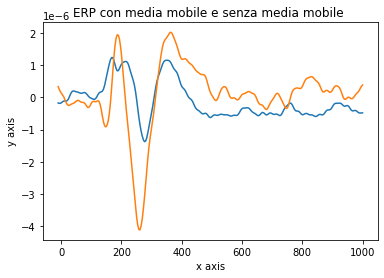

In [34]:
#stampa degli erp Animali e Uomini soggetto 1
x=np.linspace(-10,1000,269)
plt.plot(x,ERP_ROI_Animali_vector[0]) 
plt.plot(x,ERP_ROI_Uomini_vector[0])
# Add Title

plt.title("ERP animali e uomini soggetto 1") 

# Add Axes Labels

plt.xlabel("x axis") 
plt.ylabel("y axis") 

# Display

plt.show()

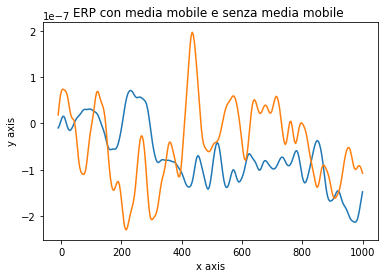

In [35]:
#stampa degli erp Animali e Uomini soggetto 2
plt.plot(x,ERP_ROI_Animali_vector[1]) 
plt.plot(x,ERP_ROI_Uomini_vector[1])
# Add Title

plt.title("ERP Animali e Uomini soggetto 2") 

# Add Axes Labels

plt.xlabel("x axis") 
plt.ylabel("y axis") 

# Display

plt.show()

In [36]:
len(ERP_ROI_Animali_vector[1])

269

In [37]:
#creo le funzioni per calcolare le features del segnale nel tempo

from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)
def std(x):
    return np.std(x,axis=-1)
def ptp(x):
    return np.ptp(x,axis=-1)
def var(x):
    return np.var(x,axis=-1)
def minim(x):
    return np.min(x,axis=-1)
def maxim(x):
    return np.max(x,axis=-1)

def argminim(x):
    return np.argmin(x,axis=-1)

def argmaxim(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)
def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concatenate_features(x):
    return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),
    argmaxim(x),abs_diff_signal(x),skewness(x),kurtosis(x)),axis=-1)

In [38]:
#calcolo e concateno le features
features_animali=[]
features_animali.append(concatenate_features(ERP_ROI_Animali_vector))
features_uomini=[]
features_uomini.append(concatenate_features(ERP_ROI_Uomini_vector))

In [21]:
#ridimensiono gli array per la corretta stampa nei tsv
features_array_stamp_animali=np.array(features_animali)
features_array_stamp_animali=features_array_stamp_animali.reshape(35,11)
features_array_stamp_animali

features_array_stamp_uomini=np.array(features_uomini)
features_array_stamp_uomini=features_array_stamp_uomini.reshape(35,11)
features_array_stamp_uomini

array([[ 6.43624849e-08, -4.45740618e-08,  6.13627340e-08,
        -1.35594636e-07,  9.93502596e-08, -7.43348127e-07,
        -1.09083372e-07, -7.95092679e-08,  1.04172655e-07,
         3.38610073e-08, -1.46699202e-07],
       [ 9.08820957e-08, -1.02703440e-07,  3.28473745e-07,
         1.24531437e-09, -3.07053765e-07,  1.73369468e-07,
        -1.19198151e-08, -2.14823395e-07, -7.27364041e-08,
         3.79572136e-08, -1.25917318e-07],
       [-8.51124437e-09, -8.24168126e-08,  1.22756155e-08,
         2.30226381e-08, -1.10679172e-07,  1.78447205e-08,
         1.73863616e-07, -7.83126822e-08, -2.50245998e-07,
         7.87395909e-08, -5.49194883e-08],
       [-1.26359808e-07, -1.80496633e-06,  1.04052714e-06,
         8.41669095e-08,  8.35419895e-08,  2.08210375e-07,
         4.34313941e-07,  6.33054120e-07,  1.17851381e-07,
         2.51645117e-07,  9.73713136e-08],
       [ 8.19901820e-08,  3.69362128e-07,  1.52578807e-07,
         1.17585690e-07,  3.39477425e-07,  5.95912163e-08,
  

In [22]:
#inserisco il numero del soggetto e la categoria di immagini osservata
features_array_stamp_animali=features_array_stamp_animali.tolist()
features_array_stamp_uomini=features_array_stamp_uomini.tolist()

for  i in range(len(nomi)):
    features_array_stamp_animali[i].insert(0,nomi[i])
    features_array_stamp_animali[i].insert(1, 'animali')
    features_array_stamp_uomini[i].insert(0,nomi[i])
    features_array_stamp_uomini[i].insert(1, 'uomini')



In [23]:
print(features_array_stamp_animali[5])

['epochs_8-epo.fif', 'animali', 9.436706721854482e-08, 1.7459980936175704e-07, 2.0094139654007022e-08, 5.8457776141332e-08, 2.412154797407762e-08, 1.625581100983631e-07, 2.680752465636012e-07, 6.655405790888768e-08, 1.618425707656917e-07, 4.2322049319901276e-07, 3.3999874461838617e-07]


In [26]:
#creazione file tsv con le feature
f=open("Features_ERP","a",newline="")
writer=csv.writer(f)

features=['soggetto', 'categoria','mean(x)','std(x)','ptp(x)','var(x)','minim(x)','maxim(x)','argminim(x)',
    'argmaxim(x)','abs_diff_signal(x)','skewness(x)','kurtosis(x)']



writer.writerow(features)


for i in range(len(nomi)):
    writer.writerow(features_array_stamp_animali[i])
    writer.writerow(features_array_stamp_uomini[i])
    

f.close()

In [27]:
#preparazione stampa degli ERP
for  i in range(len(nomi)):
    ERP_ROI_Animali_vector[i]=ERP_ROI_Animali_vector[i].tolist()
    ERP_ROI_Animali_vector[i].insert(0,nomi[i])
    ERP_ROI_Animali_vector[i].insert(1,'Animali')
                                     
    ERP_ROI_Uomini_vector[i]=ERP_ROI_Uomini_vector[i].tolist()
    ERP_ROI_Uomini_vector[i].insert(0,nomi[i])
    ERP_ROI_Uomini_vector[i].insert(1,'Uomini')

In [28]:
#stampa ERP
f=open("ERP_SUB","a",newline="")
writer=csv.writer(f)

for i in range(len(nomi)):
    writer.writerow(ERP_ROI_Animali_vector[i])
    writer.writerow(ERP_ROI_Uomini_vector[i])
    
f.close()

In [115]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GroupKFold, GridSearchCV

In [116]:
#clf=LogisticRegression()
#gkf=GroupKFold(2)
#pipe=PipeLine(([('scaler' , StandardScaler()),('clf' , clf)])
#param_grid={'clf__C' : [0.1,0.5,0.7,1,3,5,7]}
#gscv=GridSearchCV(pipe;param_grid,cv=gkf,n_jobs=2)
#gscv.fit(features_array.label_array,group=group_array)